In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay

In [10]:
data = {
    "Threshold": [1, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    "TP": [20, 50, 60, 80, 88, 90, 95, 96, 97, 98],
    "FN": [80, 50, 40, 20, 12, 10, 5, 4, 3, 2],
    "FP": [2, 5, 10, 20, 30, 40, 50, 60, 70, 80],
    "TN": [98, 95, 90, 80, 70, 60, 50, 40, 30, 20]
}

df = pd.DataFrame(data)

df['Precision'] = df['TP'] / (df['TP'] + df['FP'])
df['Recall'] = df['TP'] / (df['TP'] + df['FN'])
df['F1 Score'] = 2 * (df['Precision'] * df['Recall']) / (df['Precision'] + df['Recall'])

best_threshold = df.loc[df['F1 Score'].idxmax()]
df

,Threshold,TP,FN,FP,TN,Precision,Recall,F1 Score
0,1,20,80,2,98,0.909091,0.20,0.327869
1,5,50,50,5,95,0.909091,0.50,0.645161
2,10,60,40,10,90,0.857143,0.60,0.705882
3,15,80,20,20,80,0.800000,0.80,0.800000
4,20,88,12,30,70,0.745763,0.88,0.807339
5,25,90,10,40,60,0.692308,0.90,0.782609
6,30,95,5,50,50,0.655172,0.95,0.775510
7,35,96,4,60,40,0.615385,0.96,0.750000
8,40,97,3,70,30,0.580838,0.97,0.726592
9,50,98,2,80,20,0.550562,0.98,0.705036


In [11]:
df['TPR'] = df['Recall']
df['FPR'] = df['FP'] / (df['FP'] + df['TN'])
df['FNR'] = df['FN'] / (df['TP'] + df['FN'])

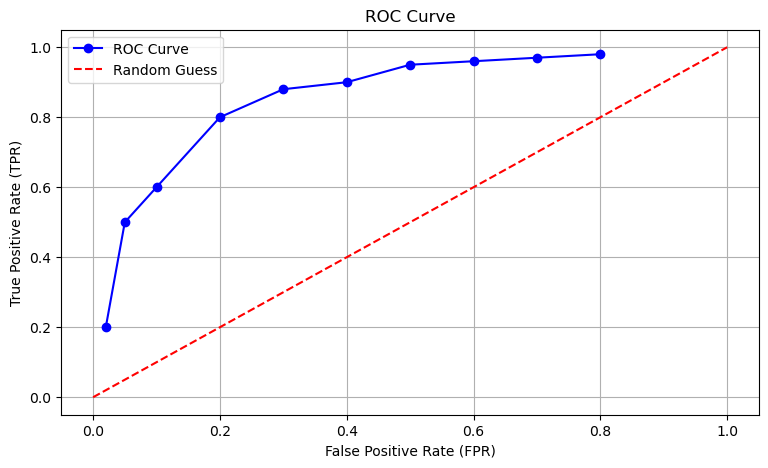

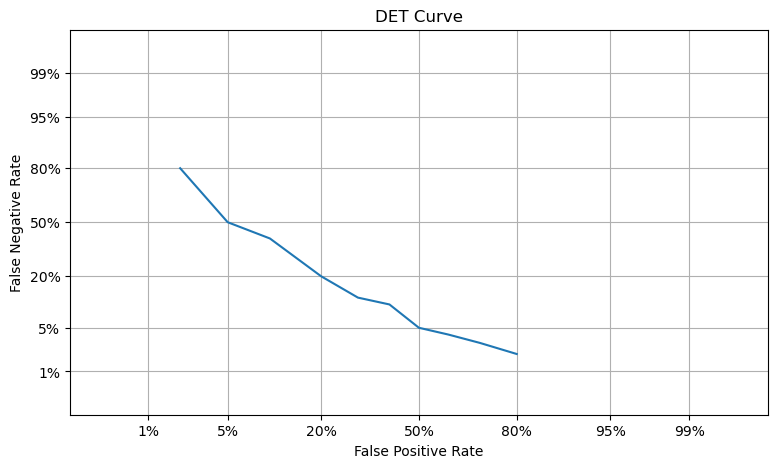

In [12]:
# Plot ROC Curve
plt.figure(figsize=(9, 5))
plt.plot(df['FPR'], df['TPR'], marker='o', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()

# Plot DET Curve
fig, ax_det = plt.subplots(figsize=(9, 5))
DetCurveDisplay(fpr=df['FPR'], fnr=df['FNR']).plot(ax=ax_det)
plt.title("DET Curve")
plt.grid()

plt.show()